In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot
import numpy as np
from plotnine import *
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [2]:
peds = pd.read_csv("MemPedCount.csv", parse_dates=['Time'])
peds2 = peds.set_index('Time')

In [3]:
peds.head()

,Time,Marshall - Sun Studio,Monroe - High Cotton / Edge Alley,Monroe & Main,Peabody & Main,Jefferson & Main,Second St,S. Main & Pontotoc
0,2018-07-01 00:00:00,0,1,377,227,427,431,164
1,2018-07-01 01:00:00,0,0,266,187,187,601,148
2,2018-07-01 02:00:00,0,0,142,76,135,364,96
3,2018-07-01 03:00:00,0,0,105,75,65,227,40
4,2018-07-01 04:00:00,0,0,12,20,28,118,28


In [4]:
peds.shape

(3672, 8)

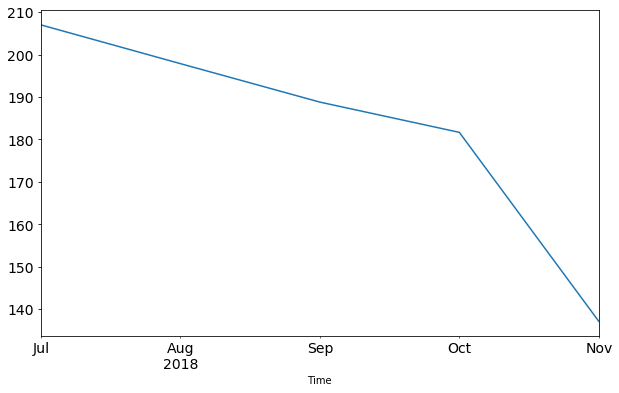

In [5]:
peds2['Peabody & Main'].resample('M').mean().plot.line(figsize=(10,6), fontsize=14)

In [6]:
peds['Second St'].max()

1059

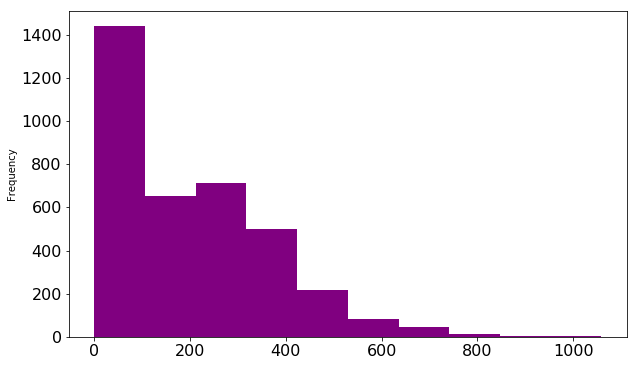

In [7]:
peds['Second St'].sort_values().plot.hist(
    figsize=(10,6),
    color='purple',
    fontsize=16,
    #title="Total Ring Time Counts"
)

In [8]:
sample = peds['Second St'] == 1059

In [9]:
peds[sample]

,Time,Marshall - Sun Studio,Monroe - High Cotton / Edge Alley,Monroe & Main,Peabody & Main,Jefferson & Main,Second St,S. Main & Pontotoc
832,2018-08-04 16:00:00,39,15,273,472,198,1059,173


In [10]:
peds['Monroe & Main'].max()

917

In [11]:
peds['Marshall - Sun Studio'].max()

232

In [12]:
peds['Monroe - High Cotton / Edge Alley'].max()

359

In [13]:
peds['Monroe & Main'].max()

917

In [14]:
peds['Peabody & Main'].max()

848

In [15]:
peds['Jefferson & Main'].max()

847

In [16]:
peds['S. Main & Pontotoc'].max()

654

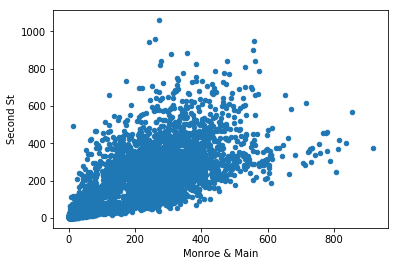

In [17]:
peds.plot.scatter(x='Monroe & Main', y='Second St')

In [18]:
test = peds['Time'].loc[505].dayofweek
if(test == 6):
    test = 'Saturday'
    
test

'Saturday'

In [19]:
days = peds.Time
days = pd.to_datetime(days)
days = days.dt.day_name()

In [20]:
days.head()

0    Sunday
1    Sunday
2    Sunday
3    Sunday
4    Sunday
Name: Time, dtype: object

In [21]:
peds['Weekday'] = days

In [22]:
export = peds.to_csv(r'MemPedCountWithDays.csv', index=False)

In [23]:
new = pd.read_csv("MemPedCountWithDays.csv", parse_dates=['Time'])

In [24]:
new = new.set_index('Time')

In [25]:
new.head()

,Marshall - Sun Studio,Monroe - High Cotton / Edge Alley,Monroe & Main,Peabody & Main,Jefferson & Main,Second St,S. Main & Pontotoc,Weekday
Time,,,,,,,,
2018-07-01 00:00:00,0,1,377,227,427,431,164,Sunday
2018-07-01 01:00:00,0,0,266,187,187,601,148,Sunday
2018-07-01 02:00:00,0,0,142,76,135,364,96,Sunday
2018-07-01 03:00:00,0,0,105,75,65,227,40,Sunday
2018-07-01 04:00:00,0,0,12,20,28,118,28,Sunday


In [26]:
monday = new[new['Weekday'] == 'Monday']

In [27]:
monday

,Marshall - Sun Studio,Monroe - High Cotton / Edge Alley,Monroe & Main,Peabody & Main,Jefferson & Main,Second St,S. Main & Pontotoc,Weekday
Time,,,,,,,,
2018-07-02 00:00:00,1,0,35,47,43,46,10,Monday
2018-07-02 01:00:00,1,0,11,41,14,54,6,Monday
2018-07-02 02:00:00,0,0,15,11,10,17,1,Monday
2018-07-02 03:00:00,0,0,23,6,6,18,3,Monday
2018-07-02 04:00:00,1,1,2,2,1,11,7,Monday
2018-07-02 05:00:00,1,0,29,9,12,24,6,Monday
2018-07-02 06:00:00,7,0,48,42,57,31,14,Monday
2018-07-02 07:00:00,2,0,90,61,101,40,18,Monday
2018-07-02 08:00:00,5,1,184,158,156,58,28,Monday


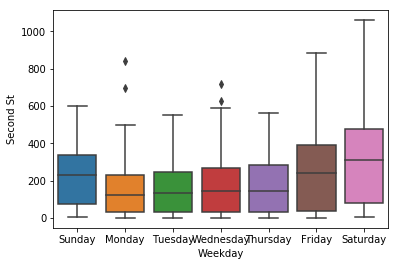

In [28]:
df = peds[peds.Weekday.isin(peds.Weekday.value_counts().index)]
sns.boxplot(
    x='Weekday',
    y='Second St',
    data=df
)

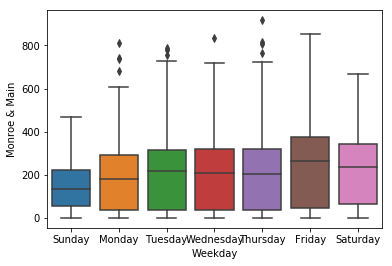

In [29]:
df = peds[peds.Weekday.isin(peds.Weekday.value_counts().index)]
sns.boxplot(
    x='Weekday',
    y='Monroe & Main',
    data=df
)

/Users/zachcornelison/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning:

Using the boxplot function without specifying `order` is likely to produce an incorrect plot.



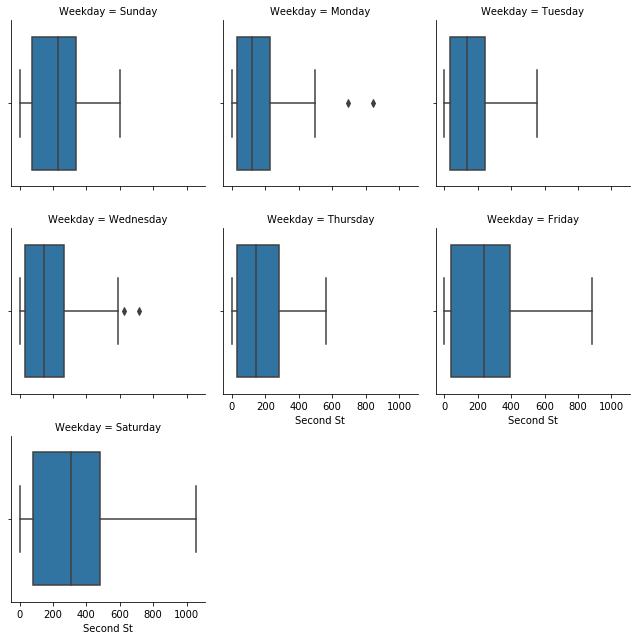

In [30]:
g = sns.FacetGrid(peds, col="Weekday", col_wrap = 3)
g.map(sns.boxplot, 'Second St')

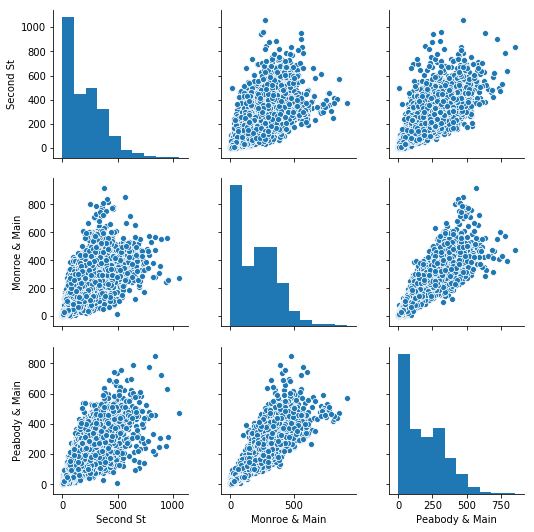

In [31]:
sns.pairplot(peds[['Second St','Monroe & Main','Peabody & Main']])